In [1]:
# Simple Two dance comparison
import polars as pl
import numpy as np
from scipy.stats import pearsonr

cluster_comp = 0

# load
df = pl.read_csv("features_complete.csv")
cluster_df = pl.read_csv("k-means-8n.csv")
joined_df = df.join(cluster_df, on="name", how="right")

# get comparison feat
feat_1 = joined_df.filter(
    pl.col("cluster") == cluster_comp
).drop(
    pl.col("name"),
    pl.col("cluster"),
).to_numpy()

# cluster search
clusters = cluster_df["cluster"].unique().to_list()
cluster_rs = []
for cluster in clusters:
    rs = []
    filter_df = joined_df.filter(
        pl.col("cluster") == cluster,
    )
    names = filter_df["name"].to_list()
    for name in names:
        for n in feat_1:
            feat_2 = joined_df.filter(
                pl.col("name") == name
            ).drop(
                pl.col("name"),
                pl.col("cluster"),
            ).to_numpy()[0]
            r = pearsonr(n, feat_2, alternative="two-sided") 
            rs.append(r.statistic)
    cluster_rs.append(rs)
    print(len(rs))

144
240
480
228
684
12
252
408


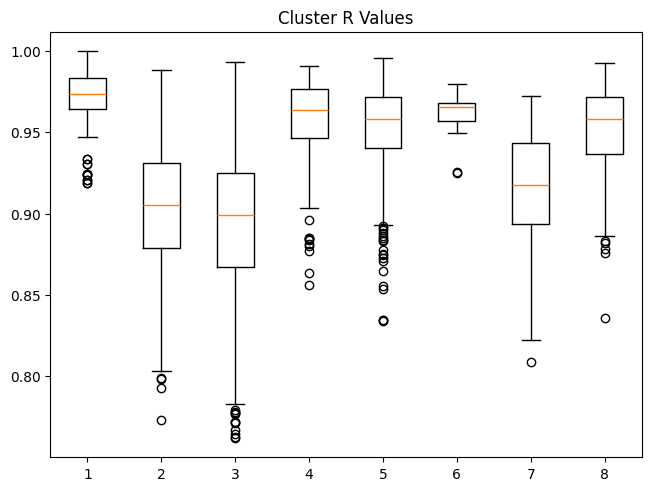

In [2]:
# Plot generated Output
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, layout="constrained")
ax.boxplot(cluster_rs)
ax.set_title("Cluster R Values")

plt.savefig("r_comp")